[{'deviceType': 'V', 'name': 'VIN', 'connectionPoints': (1, 0), 'DC': 1.0, 'AC': ('1', '1')}, {'deviceType': 'R', 'name': 'R1', 'connectionPoints': (1, 2), 'value': 1000.0}, {'deviceType': 'C', 'name': 'C1', 'connectionPoints': (2, 0), 'value': 1e-06}, {'deviceType': 'R', 'name': 'R2', 'connectionPoints': (2, 3), 'value': 1000.0}, {'deviceType': 'C', 'name': 'C2', 'connectionPoints': (3, 0), 'value': 1e-08}]
{'type': 'AC', 'variation': 'LIN', 'pointsSelect': 1.0, 'fstart': 0.0, 'fstop': 20000.0}
{'type': 'PLOT', 'prtype': 'AC', 'ovs': [{'ovtype': 'VM', 'ovnodes': ('3', '0')}]}
{'type': 'END'}
plotdc {'mode': 'V', 'subMode': 'M', 'nodes': (3, 0)}


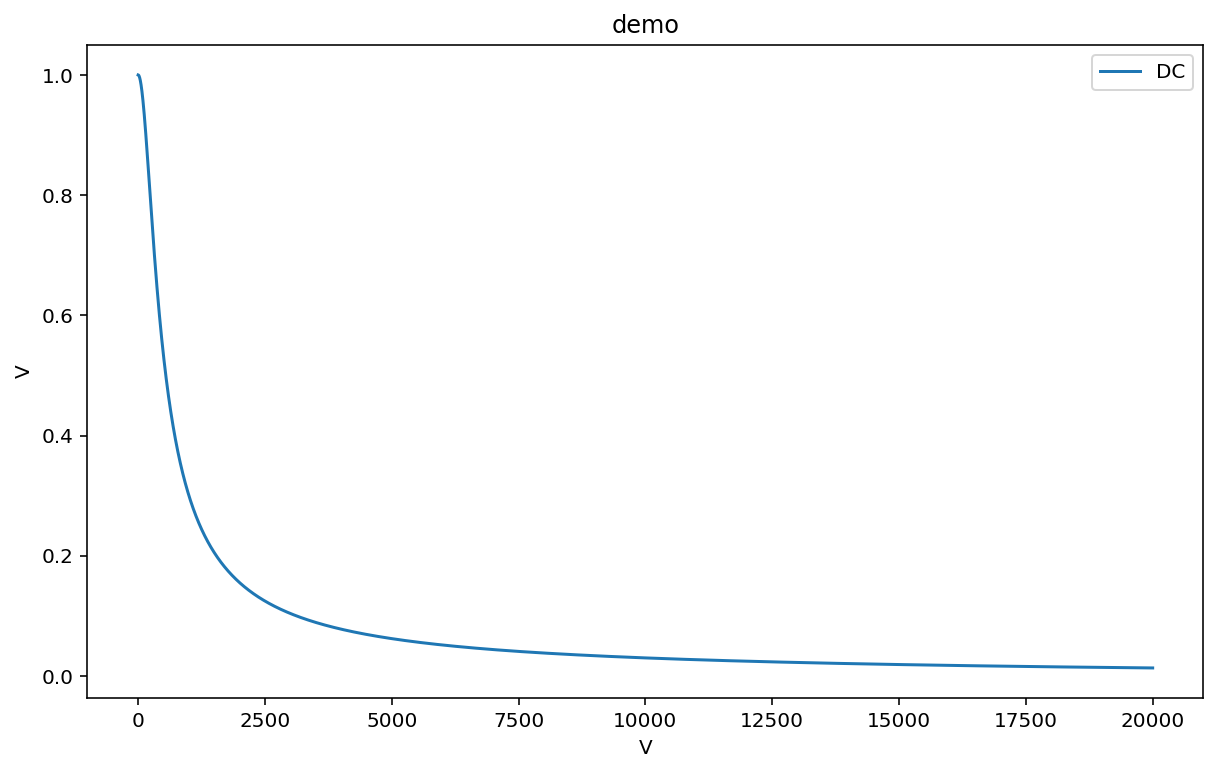

In [5]:
# simple RC
netlist1 = '''
simple one order rc-circuit for ac simulation
vdc 1 0 1 1
r1 1 2 1k
c1 2 0 100u
.AC 1 0 100
.plot ac vm(2)
.end
'''
netlist2 = '''
two order RC filter
vin 1 0 1 1
r1 1 2 1k
c1 2 0 1u
r2 2 3 1k
c2 3 0 10n
.AC 1 0 20000
.plot ac Vm(3)
.end
'''
from Spice import Spice
mySpice = Spice()
mySpice.parse(netlist2)
#mySpice.solveTran()
#mySpice.solveTran(method='FE', step=0.1, stop = 1500)
#mySpice.solveTran(method='TR', step=0.1, stop = 1500)
#mySpice.startGUI()
mySpice.plotACWithMatplotlib()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [7]:
# simple RC
netlist1 = '''
test3- from lecture06 P13,14
*test for stamping for E and G
R1 1 0 5
G2 1 0 1 2 2
R3 1 2 6
R4 2 0 8
Is 0 2 10
Vs 3 2 1
R8 3 4 5
E7 4 0 1 2 13
.end
'''
from Spice import Spice
mySpice = Spice()
mySpice.parse(netlist1)
#mySpice.solveTran()
#mySpice.solveTran(method='FE', step=0.1, stop = 1500)
#mySpice.solveTran(method='TR', step=0.1, stop = 1500)
#mySpice.startGUI()
mySpice.plotACWithMatplotlib()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

NoEnddError: No .end command!

In [15]:
# diode
netlist1 = '''
R+diode circuit to observe convergence of diode stamp
*from Lecture8 page43
v1 1 0 1 1 tran sin (1)
r1 1 2 1n
d1 2 0 somemodel
.tran 0.01 2 0
.plot tran V(2)
.end
'''
netlist2 = '''
nonlinear tran simulation of two diodes
*from lecture8 page24
C1 2 0 1
Is 0 1 1 0 tran const (1)
D1 1 0 somemodel
D2 2 0 somemodel
R1 1 0 1000 
R2 1 2 1m
.TRAN 0.01 1 0
.plot tran V(1)
.END
'''
from Spice import Spice 
mySpice = Spice()
mySpice.parse(netlist1)
mySpice.plotTranWithMatplotlib()
#mySpice.plotDCWithMatplotlib(0, -1, -0.01)

IndexError: tuple index out of range

[{'deviceType': 'R', 'name': 'R1', 'connectionPoints': (1, 2), 'value': 2.0}, {'deviceType': 'C', 'name': 'C1', 'connectionPoints': (2, 0), 'value': 0.2}, {'deviceType': 'V', 'name': 'V1', 'connectionPoints': (1, 0), 'DC': 1.0, 'AC': ('1', '1'), 'CONST': ('1',)}]
{'type': 'TRAN', 'tstep': 0.01, 'tstop': 3.0, 'tstart': 0.0}
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] [[0.]
 [0.]
 [0.]] {}
 self.tranValueBE [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  2.43902439e-02  4.87804878e-01
  -4.87804878e-01]
 [ 0.00000000e+00  1.00000000e+00  4.81856038e-02  4.75907198e-01
  -4.75907198e-01]
 ...
 [ 0.00000000e+00  1.00000000e+00  9.99378324e-01  3.10838105e-04
  -3.10838105e-04]
 [ 0.00000000e+00  1.00000000e+00  9.99393487e-01  3.03256687e-04
  -3.03256687e-04]
 [ 0.00000000e+00  1.00000000e+00  9.99408280e-01  2.95860183e-04
  -2.95860183e-04]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+0

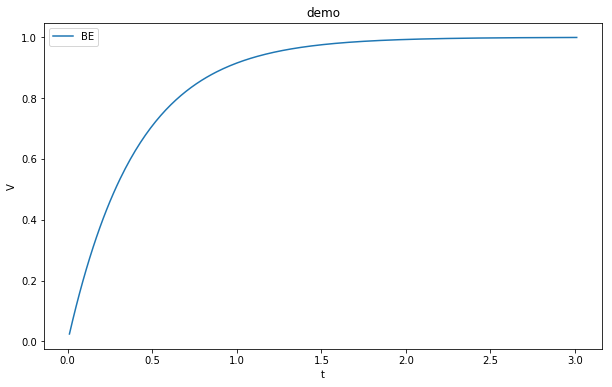

301 302


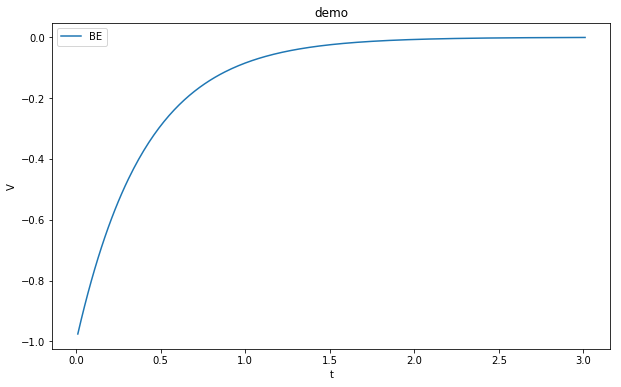

In [5]:
# linear tran
netlist1 = '''
elmore delay
vin 1 0 1 1 tran pulse (0,1,1,0.2,0.2,6,12)
r1 1 2 1k
c1 2 0 100u
r2 2 3 1k
c2 3 0 100u
r3 2 4 1k
c3 4 0 100u
r4 4 5 1k
c4 5 0 100u
r5 4 6 1k
c5 6 0 100u
r6 6 7 1k
c6 7 0 100u
.tran 0.1 20 0.0
.plot tran V(7)
.end
'''

netlist2 = '''
lc oscillation
c1 1 0 1 ic=1
l1 1 0 1
.tran 0.1 100 0.0
.plot tran V(1)
.end
'''

netlist3 = '''
rc attennuation circuit
r1 1 0 1k
c1 1 0 100u ic=1
.tran 0.01  0.7 0
.plot tran V(1)
.end
'''
netlist4 = '''
RLC under damping oscillation
c1 1 0 1 ic=1
r1 1 2 1
L1 2 0 2
.tran 0.1 30 0
.plot tran V(1)
.end
'''

netlist5='''
a simple RC circuit: zero_state_response
R1 1 2 2
C1 2 0 0.20 
V1 1 0 1 1 tran const (1)
.TRAN 0.01 3 0
*demo for .plot command
.plot tran V(2) V(2,1)
.END
'''

from Spice import Spice 
mySpice = Spice()
mySpice.parse(netlist5)
mySpice.plotTranWithMatplotlib()
#mySpice.plotDCWithMatplotlib(0, -1, -0.01)

[{'deviceType': 'V', 'name': 'VIN', 'connectionPoints': (1, 0), 'DC': 1.0, 'AC': ('0', '0'), 'PULSE': ('0', '1', '0', '0', '0', '1.0', '1.5')}, {'deviceType': 'V', 'name': 'VDD', 'connectionPoints': (2, 0), 'DC': 1.8, 'AC': ('0', '0'), 'CONST': ('1.8',)}, {'deviceType': 'M', 'name': 'M1', 'connectionPoints': (3, 1, 0, 0), 'MNAME': 'NMOS', 'L': '2U', 'W': '2U'}, {'deviceType': 'M', 'name': 'M2', 'connectionPoints': (3, 1, 2, 2), 'MNAME': 'PMOS', 'L': '2U', 'W': '4U'}, {'deviceType': 'R', 'name': 'R1', 'connectionPoints': (3, 0), 'value': 5000.0}]
{'type': 'TRAN', 'tstep': 0.1, 'tstop': 2.0, 'tstart': 0.0}
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]] [[0.]
 [0.]
 [0.]
 [0.]] {}
 self.tranValueBE [[ 0.00000000e+00  1.00000000e+00  1.80000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  1.80000000e+00  6.17778782e-01
   0.00000000e+00 -1.23555827e-04]
 [ 0.00000000e+00  1.00000000e+00  1.80000000e+00  2.88695812e-02
   0.00000000

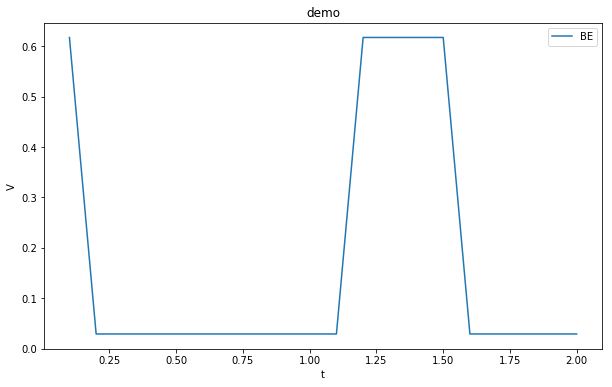

In [14]:
# linear tran
netlist1 = '''
netlist for cmos inverter's voltage transfer characteristic
Vin 1 0 1
Vdd 3 0 1.8
M1 2 1 0 0 NMOS l=2u W=2u
M2 2 1 3 3 PMOS l=2u W=8u
R1 2 0 5k
.DC Vin 0 1.8 0.1
.plot tran V(2)
.end
'''

netlist2 = '''
five coms inverter-transient simulation
Vin 1 0 1 0 tran pulse (0,1,0,0,0,1.0,1.5)
Vdd 3 0 1.8 0 tran const (1.8)
M1 4 1 0 0 NMOS l=2u W=2u
M2 4 1 3 3 PMOS l=2u W=4u
R1 4 0 6k
M3 5 4 0 0 NMOS l=2u W=2u
M4 5 4 3 3 PMOS l=2u W=4u
R2 5 0 6k
M5 6 5 0 0 NMOS l=2u W=2u
M6 6 5 3 3 PMOS l=2u W=4u
R3 6 0 6k
M7 7 6 0 0 NMOS l=2u W=2u
M8 7 6 3 3 PMOS l=2u W=4u
R4 7 0 6k
M9 2 7 0 0 NMOS l=2u W=2u
M10 2 7 3 3 PMOS l=2u W=4u
R5 2 0 6k
.tran 0.1 2 0
.plot tran V(7)
.end
'''

netlist3 = '''
nmos circuit- I/V
*vgs fixed, vds range from 0~1.8
Vin 1 0 1
Vdd 3 0 1.8
M1 2 1 0 0 NMOS l=2u w=8u
R1 2 3 5000
.DC Vdd 0 1.8 0.1
.plot tran V(2)
.end
'''
netlist4 = '''
nmos's i/v curve
*vgs changes.
Vin 1 0 1
Vdd 3 0 1.8
M1 2 1 0 0 NMOS l=2u
R1 2 3 5000
.DC Vin 0 1.8 0.1
.plot DC V(2)
.end
'''
netlist5 = '''
coms inverter-transient simulation
Vin 1 0 1 0 tran pulse (0,1,0,0,0,1.0,1.5)
Vdd 3 0 1.8 0 tran const (1.8)
M1 2 1 0 0 NMOS l=2u W=2u
M2 2 1 3 3 PMOS l=2u W=4u
R1 2 0 5k
.tran 0.1 2 0
.plot tran V(2)
.end
'''
netlist6 = '''
R+NMOS inverter-- transient sim
Vin 1 0 1 0 tran pulse (0,1.8,0,0.1,0.1,0.5,1)
Vdd 3 0 1.8 0 tran const (1.8)
M1 2 1 0 0 NMOS l=2u
R1 2 3 5000
.tran 0.01 2 0
.end
'''

from Spice import Spice 
mySpice = Spice()
mySpice.parse(netlist5)
mySpice.plotTranWithMatplotlib()
#mySpice.plotDCWithMatplotlib(0, -1, -0.01)

{'type': 'PLOT', 'prtype': 'TRAN', 'ovs': [{'ovtype': 'I', 'ovnodes': ('V1', '0')}]}
{'type': 'END'}
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] [[0.]
 [0.]
 [0.]] {}


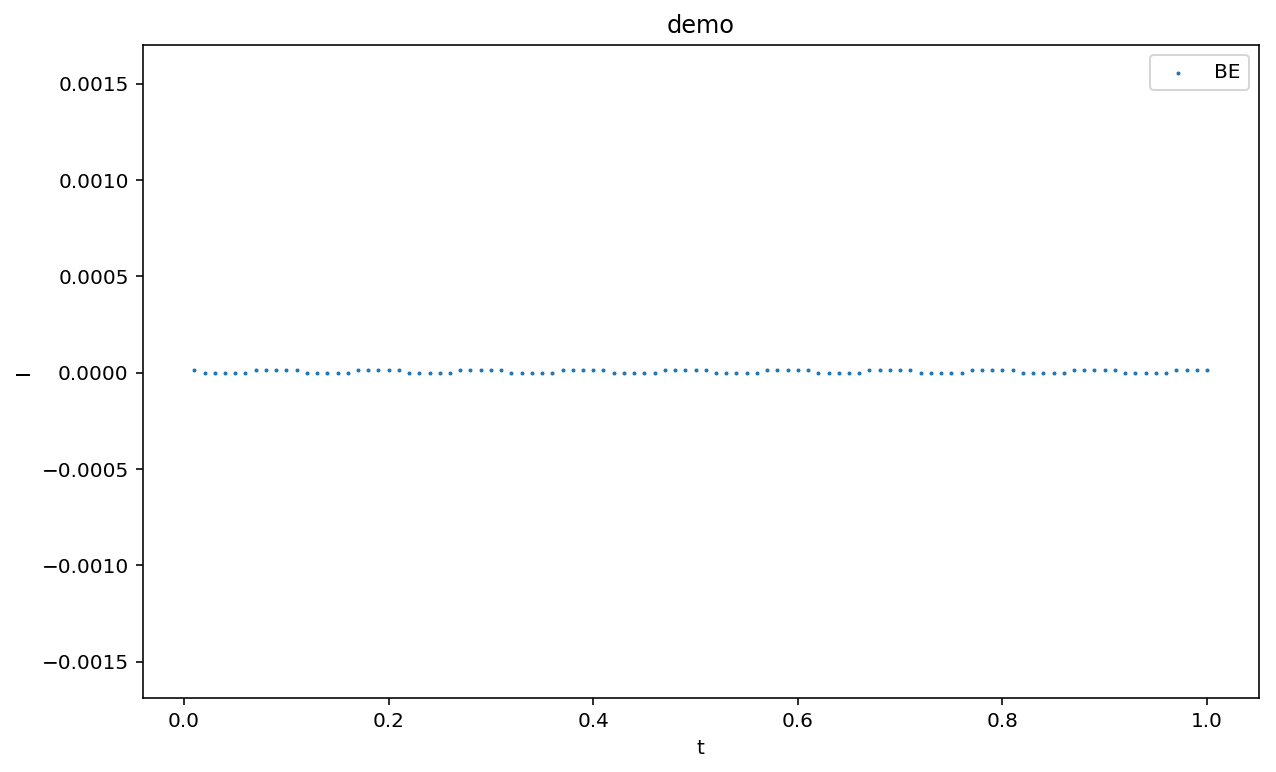

In [3]:
netlist = """
*netlist example 1
*netlist example 1
V2 1 0 -0.7
V1 2 0 0.1 pulse(-1 1 50n 50n 50n 50m 100m)
M1 2 1 0 0 PMOS

*.plot DC I(V1)
*.DC V1 0 -1 -0.01 V2 0 -1 -0.1
.plot tran I(v1) 
.end
"""
step=0.01
stop=100
from Spice import Spice 
mySpice = Spice()
mySpice.parse(netlist)
mySpice.solveTran(step=step,stop=stop)
mySpice.plotTranWithMatplotlib(step=step,stop=stop)
#mySpice.plotDCWithMatplotlib(0, -1, -0.01)

[{'deviceType': 'C', 'name': 'C1', 'connectionPoints': (1, 0), 'value': 1.0, 'IC': 1.0}, {'deviceType': 'R', 'name': 'R1', 'connectionPoints': (1, 2), 'value': 1.0}, {'deviceType': 'L', 'name': 'L1', 'connectionPoints': (2, 0), 'value': 2.0}]
{'type': 'TRAN', 'tstep': 0.1, 'tstop': 30.0, 'tstart': 0.0}
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] [[0.]
 [0.]
 [0.]] {}
 self.tranValueBE [[ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  9.95260664e-01  9.47867299e-01 -4.73933649e-02
   4.73933649e-02]
 [ 0.00000000e+00  9.86051526e-01  8.93960154e-01 -9.20913726e-02
   9.20913726e-02]
 ...
 [ 0.00000000e+00  3.66747720e-04  2.76869077e-04 -8.98786425e-05
   8.98786425e-05]
 [ 0.00000000e+00  3.56490276e-04  2.53915842e-04 -1.02574435e-04
   1.02574435e-04]
 [ 0.00000000e+00  3.45078053e-04  2.30955828e-04 -1.14122226e-04
   1.14122226e-04]]
[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00 

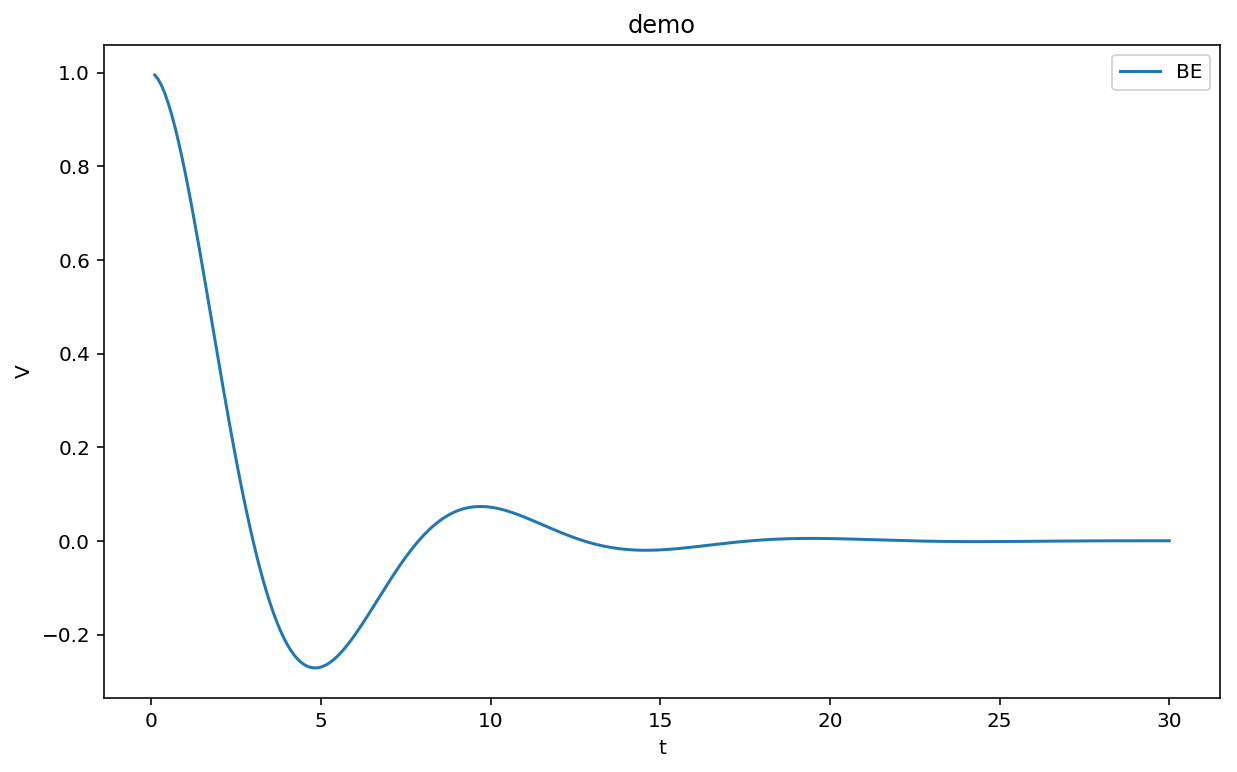

In [2]:
netlist = '''
two cascaded R+NMOS inverter-- transient sim
Vin 1 0 1 0 tran pulse (0,1.8,0,0.1,0.1,0.5,1)
Vdd 3 0 1.8 0 tran const (1.8)
M1 4 1 0 0 NMOS l=2u
R1 4 3 5000
M2 2 4 0 0 NMOS l=2u
R2 2 3 5000
.plot tran V(2)
.tran 0.01 2 0
.end
'''
netlist1 = '''
two cascaded R+NMOS inverter-- transient sim
Vin 1 0 1 0 tran pulse (0,1.8,0,0.1,0.1,0.5,1)
Vdd 3 0 1.8 0 tran const (1.8)
M1 4 1 0 0 NMOS l=2u
R1 4 3 5000
M2 2 4 0 0 NMOS l=2u
R2 2 3 5000
.plot tran V(2)
.tran 0.01 2 0
.end

'''
netlist2 = '''
lc oscillation
c1 1 0 1 ic=1
l1 1 0 1
.tran 0.1 50 0.0
.plot tran V(1)
.end
'''

netlist3 = '''
R+NMOS inverter-- transient sim
Vin 1 0 1 0 tran pulse (0,1.8,0,0.1,0.1,0.5,1)
Vdd 3 0 1.8 0 tran const (1.8)
M1 2 1 0 0 NMOS l=2u
R1 2 3 5000
.plot tran V(2)
.tran 0.01 2 0
.end

'''
netlist4 = '''
two coms inverter-transient simulation
Vin 1 0 1 0 tran pulse (0,1,0,0,0,1.0,1.5)
Vdd 3 0 1.8 0 tran const (1.8)
M1 4 1 0 0 NMOS l=2u W=2u
M2 4 1 3 3 PMOS l=2u W=5u
R1 4 0 5k
M3 2 4 0 0 NMOS l=2u W=2u
M4 2 4 3 3 PMOS l=2u W=5u
R2 2 0 5K
.tran 0.1 2 0
.plot tran V(2)
.end

'''
netlist5 = '''
elmore delay
vin 1 0 1 1 tran pulse (0,1,1,0.2,0.2,6,12)
r1 1 2 1k
c1 2 0 100u
r2 2 3 1k
c2 3 0 100u
r3 2 4 1k
c3 4 0 100u
r4 4 5 1k
c4 5 0 100u
r5 4 6 1k
c5 6 0 100u
r6 6 7 1k
c6 7 0 100u
.tran 0.1 20 0.0
.plot tran V(3)
.end
'''

netlist6 = '''
RLC under damping oscillation
c1 1 0 1 ic=1
r1 1 2 1
L1 2 0 2
.tran 0.1 30 0
.plot tran V(1)
.end
'''
step = 0.2
stop = 1000
from Spice import Spice
mySpice = Spice()
mySpice.parse(netlist6)
#mySpice.solveTran()
#mySpice.solveTran(method='FE', step=0.1, stop = 1500)
#mySpice.solveTran(method='TR', step=0.1, stop = 1500)
#mySpice.startGUI()
mySpice.plotTranWithMatplotlib()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

[{'deviceType': 'V', 'name': 'VIN', 'connectionPoints': (1, 0), 'DC': 1.0, 'AC': ('1', '1')}, {'deviceType': 'R', 'name': 'R1', 'connectionPoints': (1, 2), 'value': 1000.0}, {'deviceType': 'C', 'name': 'C1', 'connectionPoints': (2, 0), 'value': 1e-06}, {'deviceType': 'R', 'name': 'R2', 'connectionPoints': (2, 3), 'value': 1000.0}, {'deviceType': 'C', 'name': 'C2', 'connectionPoints': (3, 0), 'value': 1e-08}]
{'type': 'AC', 'variation': 'LIN', 'pointsSelect': 1.0, 'fstart': 0.0, 'fstop': 20000.0}
[0.0000e+00 1.0000e+00 2.0000e+00 ... 1.9997e+04 1.9998e+04 1.9999e+04]
Acvalue [[ 0.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
   1.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
   9.99989931e-01-3

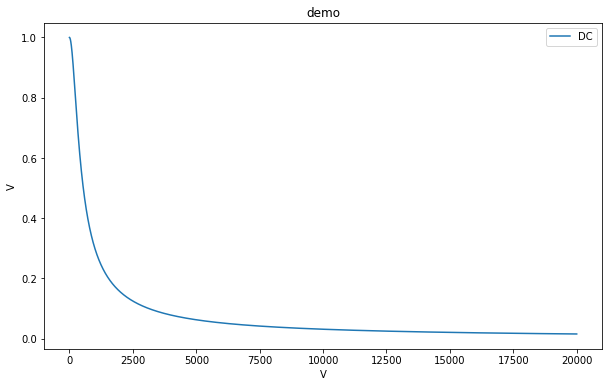

In [4]:
#AC
netlist = '''simple one order rc-circuit for ac simulation
vdc 1 0 1 1
r1 1 2 1k
c1 2 0 100u
.AC 1 0 100
.plot ac vm(2)
.end
'''
netlist2 = '''
two order RC filter
vin 1 0 1 1
r1 1 2 1k
c1 2 0 1u
r2 2 3 1k
c2 3 0 10n
.AC 1 0 20000
.plot ac V(2)
.end
'''
from Spice import Spice
mySpice = Spice()
mySpice.parse(netlist2)
mySpice.plotACWithMatplotlib()

[{'deviceType': 'V', 'name': 'V1', 'connectionPoints': (1, 0), 'DC': 10.0}, {'deviceType': 'R', 'name': 'R2', 'connectionPoints': (1, 2), 'value': 5.0}, {'deviceType': 'L', 'name': 'L3', 'connectionPoints': (1, 2), 'value': 4.0}, {'deviceType': 'C', 'name': 'C4', 'connectionPoints': (2, 0), 'value': 3.0}]
{'type': 'PRINT', 'prtype': 'TRAN', 'ovs': [{'ovtype': 'V', 'ovnodes': ('2', '0')}]}
{'type': 'END'}
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] [[0.]
 [0.]
 [0.]] {}
 self.tranValueBE [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+01  1.63934426e-01 -2.45901639e+00
   4.91803279e-01  2.45901639e+00]
 [ 0.00000000e+00  1.00000000e+01  3.57430798e-01 -2.90244558e+00
   9.73931739e-01  2.90244558e+00]
 ...
 [ 0.00000000e+00  1.00000000e+01  9.99761124e+00 -1.15083032e-03
   6.73078151e-04  1.15083032e-03]
 [ 0.00000000e+00  1.00000000e+01  9.99769454e+00 -1.24944429e-03
   7.88351379e-04  1.24944429e-03]
 [ 0.

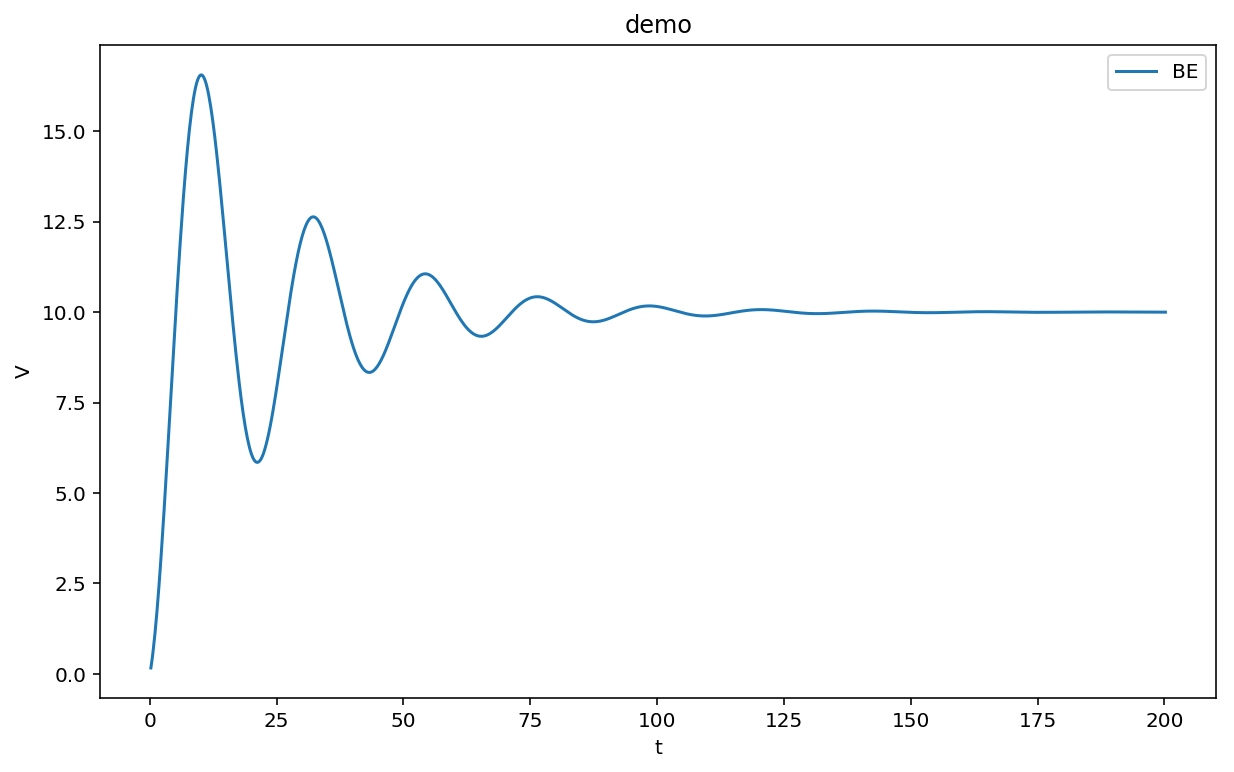

In [5]:
#test
netlist = """
*netlist example 1
V1 1 0 10
R2 1 2 5
L3 1 2 4
C4 2 0 3
.print tran V(2)
.end
"""
step = 0.2
stop = 200
from Spice import Spice
mySpice = Spice()
mySpice.parse(netlist)
mySpice.solveTran(method='BE', step=step, stop = stop, timeStepControl=False)
#mySpice.solveTran(method='FE', step=0.1, stop = 1500)
#mySpice.solveTran(method='TR', step=0.1, stop = 1500)
#mySpice.startGUI()
mySpice.plotTranWithMatplotlib()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

[{'deviceType': 'C', 'name': 'C1', 'connectionPoints': (1, 0), 'value': 1.0, 'IC': 1.0}, {'deviceType': 'L', 'name': 'L1', 'connectionPoints': (1, 0), 'value': 1.0}]
{'type': 'TRAN', 'tstep': 0.1, 'tstop': 50.0, 'tstart': 0.0}
[[0. 0.]
 [0. 0.]] [[0.]
 [0.]] {}
 self.tranValueBE [[ 0.          1.          0.          0.        ]
 [ 0.          0.99009901 -0.0990099   0.0990099 ]
 [ 0.          0.97049309 -0.19605921  0.19605921]
 ...
 [ 0.          0.06780281  0.0494873  -0.0494873 ]
 [ 0.          0.07203123  0.04228418 -0.04228418]
 [ 0.          0.0755046   0.03473372 -0.03473372]]
[[ 0.          1.          0.          0.        ]
 [ 0.          0.99009901 -0.0990099   0.0990099 ]
 [ 0.          0.97049309 -0.19605921  0.19605921]
 ...
 [ 0.          0.06780281  0.0494873  -0.0494873 ]
 [ 0.          0.07203123  0.04228418 -0.04228418]
 [ 0.          0.0755046   0.03473372 -0.03473372]]
step stop start in spice 0.1 50.0 0.0
{'type': 'PLOT', 'prtype': 'TRAN', 'ovs': [{'ovtype': 'V',

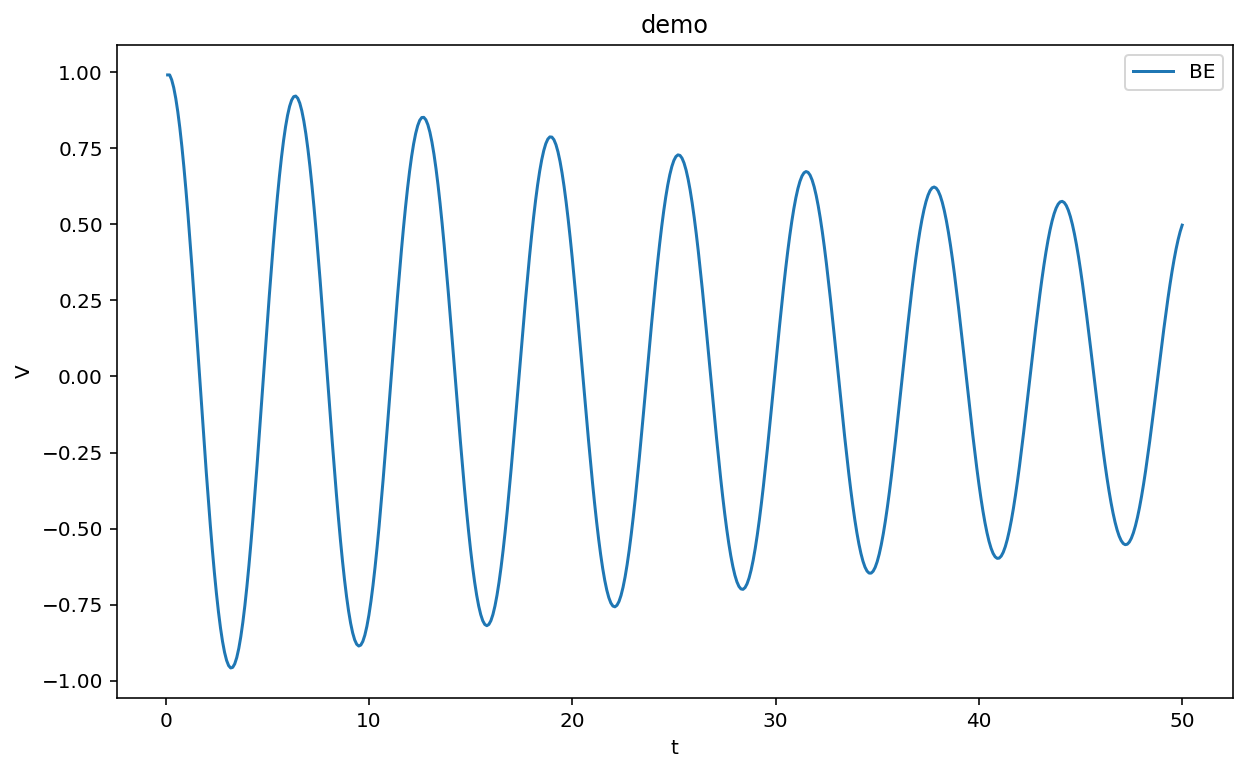

In [3]:
#test
netlist = """
*netlist example 1
V1 1 0 10
R2 1 2 5
L3 1 2 4
C4 2 0 3
.print tran V(2)
.end
"""
netlist2 = '''
lc oscillation
c1 1 0 1 ic=1
l1 1 0 1
.tran 0.1 50 0.0
.plot tran V(1)
.end
'''
step = 0.2
stop = 200
step = 0.1
stop = 50
from Spice import Spice
mySpice = Spice()
mySpice.parse(netlist2)
mySpice.solveTran(method='BE', step=step, stop = stop,timeStepControl=True)
#mySpice.solveTran(method='FE', step=0.1, stop = 1500)
#mySpice.solveTran(method='TR', step=0.1, stop = 1500)
#mySpice.startGUI()
mySpice.plotTranWithMatplotlib()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [ ]:
netlist = """
*sigmoid
V1 1 0 1.8
I2 2 0 200u

M1p 0 3 2 1 PMOS W=5 L=1
M2n 1 3 2 0 NMOS W=4.5 L=1
M3 2 3 1 1 PMOS  W=7 L=2
M4 2 3 0 0 NMOS  W=1.5 L=1
M5 3 3 1 1 PMOS  W=4 L=1
M6 3 3 0 0 NMOS  W=1.5 L=1
Ro 2 0 100G
.nodeset V(1)=1.8
.plot DC V(2)
.DC I2 -100u 100u 1u
.print DC V(2) I(V1)
.end
"""

from Spice import Spice 
mySpice = Spice()
mySpice.parse(netlist)
mySpice.plotDCWithMatplotlib(1, 2, 0.1)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

commandParams {'type': 'DC', 'src1': 'I2', 'start1': -9.999999999999999e-05, 'stop1': 9.999999999999999e-05, 'incr1': 1e-06}
[{'deviceType': 'V', 'name': 'V1', 'connectionPoints': (1, 0), 'DC': 1.8}, {'deviceType': 'I', 'name': 'I2', 'connectionPoints': (2, 0), 'DC': 0.00019999999999999998}, {'deviceType': 'M', 'name': 'M1P', 'connectionPoints': (0, 3, 2, 1), 'MNAME': 'PMOS', 'W': '5', 'L': '1'}, {'deviceType': 'M', 'name': 'M2N', 'connectionPoints': (1, 3, 2, 0), 'MNAME': 'NMOS', 'W': '4.5', 'L': '1'}, {'deviceType': 'M', 'name': 'M3', 'connectionPoints': (2, 3, 1, 1), 'MNAME': 'PMOS', 'W': '7', 'L': '2'}, {'deviceType': 'M', 'name': 'M4', 'connectionPoints': (2, 3, 0, 0), 'MNAME': 'NMOS', 'W': '1.5', 'L': '1'}, {'deviceType': 'M', 'name': 'M5', 'connectionPoints': (3, 3, 1, 1), 'MNAME': 'PMOS', 'W': '4', 'L': '1'}, {'deviceType': 'M', 'name': 'M6', 'connectionPoints': (3, 3, 0, 0), 'MNAME': 'NMOS', 'W': '1.5', 'L': '1'}, {'deviceType': 'R', 'name': 'RO', 'connectionPoints': (2, 0), '